In [171]:
from data_loader import load_latest_iteration, find_latest_vtu_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [172]:
mode = "hard"
FOLDER = f"../demo/cpp/hard/build/src/vtk_output_{mode}/data"

data = load_latest_iteration(FOLDER)

Latest iteration 0 is not the same as the global latest iteration 374


In [173]:
data.keys()

dict_keys(['domain', 'constraints', 'particles', 'simulation', 'parameters'])

In [174]:
particles = data["particles"]
parameters = data["parameters"]












In [175]:
params = data["parameters"]
params

,dt_s,end_time,log_frequency_seconds,min_box_size_x,min_box_size_y,min_box_size_z,xi,TAU,l0,LAMBDA,...,max_bbpgd_iterations,max_recursive_iterations,linked_cell_size,growth_factor,particle_preallocation_factor,mode,x,y,z,rank
0,25.0,33000.0,60.0,2.0,2.0,0.0,720000.0,3240.0,1.0,0.00244,...,100000,50,2.2,1.5,12.0,0,NaN,NaN,NaN,0


In [176]:
particles.describe()

,gid,quaternion_x,quaternion_y,quaternion_z,quaternion_w,orientation_x,orientation_y,orientation_z,lengths_x,lengths_y,...,velocity_linear_x,velocity_linear_y,velocity_linear_z,velocity_angular_x,velocity_angular_y,velocity_angular_z,rank,x,y,z
count,3044.000000,3044.000000,3044.0,3044.0,3044.000000,3044.000000,3044.000000,3044.0,3044.000000,3044.0,...,3044.000000,3044.000000,3044.0,3044.0,3044.0,3044.000000,3044.000000,3044.000000,3044.000000,3044.0
mean,1592.005913,0.633895,0.0,0.0,0.319432,0.115651,0.252348,0.0,1.304040,0.5,...,-0.000002,-0.000001,0.0,0.0,0.0,-0.000002,7.248357,-0.725549,0.010023,0.0
std,968.312429,0.395038,0.0,0.0,0.583309,0.693234,0.665338,0.0,0.313902,0.0,...,0.000078,0.000080,0.0,0.0,0.0,0.000236,3.966515,14.106422,13.562547,0.0
min,0.000000,-0.994680,0.0,0.0,-0.999958,-0.999993,-0.999991,0.0,1.004190,0.5,...,-0.000506,-0.001384,0.0,0.0,0.0,-0.004972,0.000000,-26.466000,-26.465000,0.0
25%,760.750000,0.431308,0.0,0.0,-0.071517,-0.567510,-0.292249,0.0,1.084653,0.5,...,-0.000039,-0.000037,0.0,0.0,0.0,-0.000066,4.000000,-12.549100,-11.254000,0.0
50%,1521.500000,0.779596,0.0,0.0,0.470751,0.228691,0.425671,0.0,1.178390,0.5,...,-0.000003,0.000002,0.0,0.0,0.0,-0.000002,7.000000,-1.652885,0.112642,0.0
75%,2527.250000,0.942254,0.0,0.0,0.824812,0.778200,0.876004,0.0,1.282880,0.5,...,0.000032,0.000038,0.0,0.0,0.0,0.000064,11.000000,12.537775,11.338150,0.0
max,3288.000000,1.000000,0.0,0.0,0.999998,1.000000,1.000000,0.0,2.000000,0.5,...,0.000626,0.000675,0.0,0.0,0.0,0.001573,15.000000,26.814900,26.650900,0.0


In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wavelength
import stress

In [178]:
bin_centers, avg_length, wavelength_fft = wavelength.comprehensive_wavelength_analysis(
    particles, plot=False)


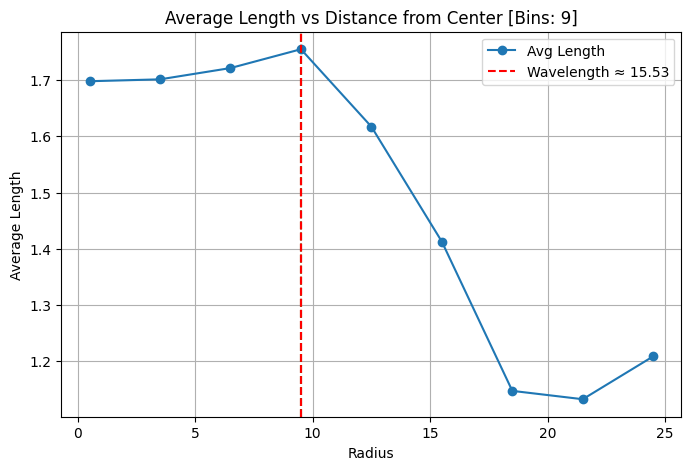

In [179]:
bin_centers, avg_length, wavelength_fft = wavelength.comprehensive_wavelength_analysis(
    particles)

plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_length, "o-", label="Avg Length")
plt.xlabel("Radius")
plt.ylabel("Average Length")
plt.title(f"Average Length vs Distance from Center [Bins: {bin_centers.size}]")
plt.grid(True)

# place vertical lines at multiples of wavelength
first_peak = bin_centers[np.argmax(avg_length)]
max_radius = bin_centers.max()

for direction, color in [(+1, "r"), (-1, "g")]:
    current = first_peak
    while 0 < current < max_radius:
        plt.axvline(current, color=color, linestyle="--")
        current += direction * wavelength_fft

# add one legend entry for wavelength
plt.axvline(first_peak, color="r", linestyle="--",
            label=f"Wavelength ≈ {wavelength_fft:.2f}")

plt.legend()
plt.show()

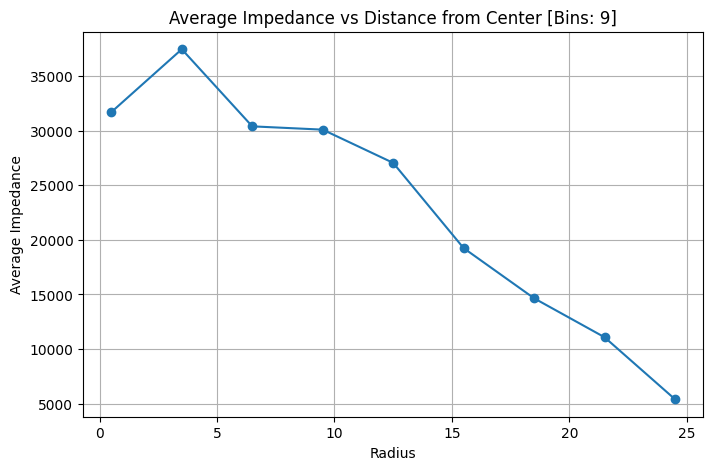

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wavelength
import stress


bin_centers, avg_impedance = stress.stress_distribution(particles)


plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_impedance, "o-", label="Avg Impedance")
plt.xlabel("Radius")
plt.ylabel("Average Impedance")
plt.title(
    f"Average Impedance vs Distance from Center [Bins: {bin_centers.size}]")
plt.grid(True)